### 3. Evaluation Metrics

When comes to ML problems, there will be a lot odf different metrics in the real world. Sometimes, new mtrics are are created to solve a bussiness case.

Some metrics used in the supervised **classification** learning context are:
* Accuracy
* Precision
* Recall
* F1 Score
* Area Under the ROC or curve, (AUC)
* LogLoss
* Average precision
* Mean average precision

Some metrics used in the supervised **Regression** learning context are:
* Mean absolute error (MAE)
* Mean Squared error (MSE)
* Root mean squared error (RMSE)
* Root mean squared logarithmic error (RMSLE)
* Mean absolute percentage error (MAPE)
* R^2^



#### Example:
Supposing we have a **binary classification problem.**

Classifying X-ray images from lungs, some of them have collapsed lungs vs normal ones.

Task: To build a classifier that given a chest X-ray image can detect if is pneumotorax.

Assumptions: Equal numbers of samples, being 100 positive vs 100 negatives, then a total of 200 images.

1. Divide the data described in 2 sets of 100 images each -> Training and validation set, having a total of 50 positives and 50 negative samples.

*Having an equal number of positive and negative samples in a binary classification metric --> Accuracy, precision, recall and f1*

#### Accuracy:

In [1]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy store
    """
    # Initialize a simple counter for correct predictions
    correct_counter = 0
    # Loop over all elements in y_true and y_pred together
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # If prediction is equal to truth, increase the counter.
            correct_counter += 1

    # Return accuracy
    # Which is correct predictions over the number of samples
    return correct_counter / len(y_true)

#### Precision
If the dataset changes as: 180 normal images vs 20 with pneumothorax. We need to create a training and validation set with the same
ratio of positive to negative targets.

In each set 90 normal vs 10 pneumothorax images.

it is necessary to learn certain concepts needed now that we assume the normal samples = 0 and pneumothorax = 1

##### True positive (TP)
Given an image, if the model predicts the correct one having pneumothorax and the actual target also predicts the correct answer then is a **True Positive**

##### True Negative (TN)
Given an image, if the model predicts that the image does not have pneumothorax and the target also says that is a non-pneumothorax then is a **True Negative**

##### False positive (FP)
Given an image, if the model predicts pneumothorax and the actual target image is a non-pneumothorax then is a **False Positive**

##### False negative (FN)
Given an image, if the model predicts non-pneumothorax and the actual target image is pneumothorax then is a **False Negative**

In [3]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    #Initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1

    return tp


def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    #Initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1

    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of False positives
    """
    #Initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1

    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of False Negatives
    """
    #Initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

    return fn


In [4]:
### Implementing accuracy score using the functions defined before
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values.
    :return: accuracy score.
    """
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)

    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [5]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

accuracy(l1, l2)

0.625

In [6]:
accuracy_v2(l1, l2)

0.625

In [8]:
from sklearn import metrics

metrics.accuracy_score(l1, l2)

0.625

#### Precision
defined as
*Precision = TP / (TP + FP)*

By implementing TP, TN, FP and FN, then is easy to implement precision



In [9]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values.
    :return: Precision Score.
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision_score = tp / (tp + fp)
    return precision_score

In [10]:
precision(l1, l2)

0.6666666666666666

#### Recall
Recall indicates the number of positive samples identified correctly.

* *Recall = TP / (TP + FN)*

In [11]:
def recall(y_true, y_pred):
    """
    Function to calculate Recall
    :param y_true: list of true values
    :param y_pred: list of predicted values.
    :return: Precision Score.
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall_score = tp / (tp + fn)
    return recall_score

In [12]:
recall(l1, l2)

0.5

For a good model, precision and recall values should be high. In the example above, recall is high but precision is low which indicates that our model indicates a lot of false positives
but fewer false negatives.

Most of the models predict a probability, and when predict the threshold is set to 0.5. This is not always ideal, and depending on the threshold the value of recall and precision will change
drastically. For each threshold chosen it is necessary to calculate precision and recall values, and plotting that set of values. That plot is known as **precision-recall curve**

### F1 score
It is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall.

Being Precision = P and Recall = R then *F1 = 2PR / (P + R)*
That can be converted into: *F1 = 2TP /  (2TP + FP + FN)*

In [13]:
def f1(y_true, y_pred):
    """
    Function to calculate the F1 Score.
    :param y_true: List of true values
    :param y_pred: List of predicted values
    :return: F1 Score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    f1_score = 2 * p * r / (p + r)
    return f1_score


In [14]:
f1(l1, l2)

0.5714285714285715

In [15]:
metrics.f1_score(l1, l2)

0.5714285714285715

* Instead of looking at precision and recall individually the F1 score should be used. This score also ranges from 0 to 1 .
* When dealing with skewed targets in datasets, the F1 score is more reliable than accuracy.

### TPR - True Positive Rate
It is equivalent to recall

In [17]:
def tpr(y_true, y_pred):
    """
    Function to calculate the TPR.
    :param y_true: List of true values
    :param y_pred: List of predicted values
    :return: tpr/recall Score
    """
    return recall(y_true, y_pred)

### FPR - False Positive rate.
It is defined by *FPR = FP / (TN + FP)

In [21]:
def fpr(y_true, y_pred):
    """
    Function to calculate the FPR.
    :param y_true: List of true values
    :param y_pred: List of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)

    fpr_score = fp / (tn + fp)
    return fpr_score

1 - FPR is known as specificity or True Negative Rate or TNR.

In [22]:
tpr_list = []
fpr_list = []

# Actual targets
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]

# Predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1]

# loop over all thresholds
for thresh in thresholds:
    # Calculate the predictions for a given threshold
    tem_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    tem_tpr = tpr(y_true, tem_pred)
    # calculate fpr
    tem_fpr = fpr(y_true, tem_pred)
    # append tpr and fpr to lists
    tpr_list.append(tem_tpr)
    fpr_list.append(tem_fpr)

In [26]:
print(fpr_list)
print(tpr_list)

[1.0, 0.9, 0.7, 0.6, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]


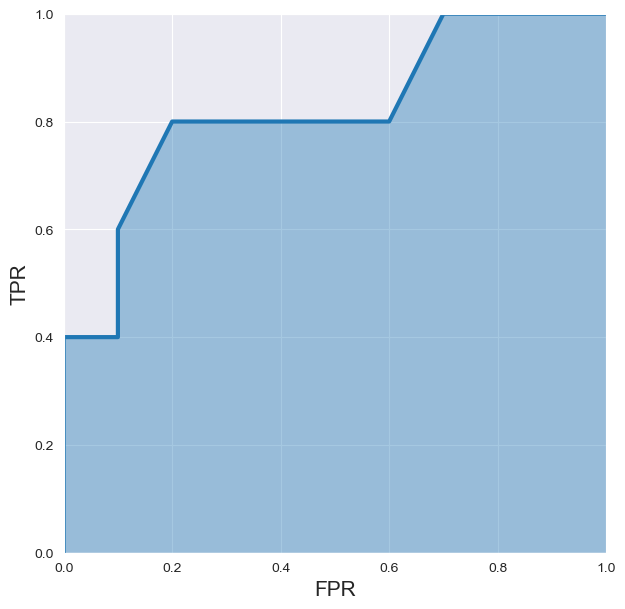

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

### Conclusion
The curve above is known as the **Receiver Operating Characteristic (ROC)**. And calculating the area under the ROC curve is equivalent to another metric
used when the dataset studied has skewed binary targets.

The metric mentioned is known as the **Area Under the Curve (AUC)**. The values range from 0 to 1.

* **AUC = 1** implies that the model is perfect. Usually, it means that there was a mistake with validation, and it should revisit the data processing and validation
pipeline.
* **AUC = 0** implies that the model is very bad. Try inverting the probabilities for the predictions, e.g., if the probability for a predicted class is p, reconsider
to substituting it for 1 - p. This AUC indicates thaT there is some problem with the validation or data processing.
* **AUC = 0.5** implies that the predictions are random. So, for any binary classification problem, if  predicts all targets as 0.5.

AUC values between 0 and 0.5 imply that the model is worse than random.

